# vis-cbx-si-errors-mwp

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Linear Regression of Desired Volume vs. Pumped Volume

In [2]:
wgt_vial = [
    10.1195,
    9.9988,
    10.0527,
    10.0164,
    9.9364,
    9.9570,
    9.9182,
    9.9599,
    10.0953,
]

wgt_vial_h2o = [
    11.1168,
    10.9823,
    11.0471,
    10.1149,
    10.0384,
    10.0517,
    9.9351,
    9.9696,
    10.1039,
]

In [3]:
df = pd.DataFrame([wgt_vial, wgt_vial_h2o])
df_T = df.T
df_T.columns = ['Weight Vial (g)', 'Weight Vial+H2O (g)']
df_T['Volume H2O (mL)'] = df_T['Weight Vial+H2O (g)'] - df_T['Weight Vial (g)']
df_T['Desired Volume (mL)'] = [1.00, 1.00, 1.00, 0.10, 0.10, 0.10, 0.01, 0.01, 0.01]
df_T

,Weight Vial (g),Weight Vial+H2O (g),Volume H2O (mL),Desired Volume (mL)
0,10.1195,11.1168,0.9973,1.00
1,9.9988,10.9823,0.9835,1.00
2,10.0527,11.0471,0.9944,1.00
3,10.0164,10.1149,0.0985,0.10
4,9.9364,10.0384,0.1020,0.10
5,9.9570,10.0517,0.0947,0.10
6,9.9182,9.9351,0.0169,0.01
7,9.9599,9.9696,0.0097,0.01
8,10.0953,10.1039,0.0086,0.01


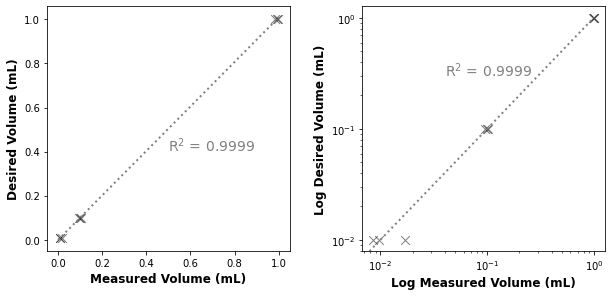

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,4.5))
plt.subplots_adjust(wspace=0.3)

plt.yscale("log")
plt.xscale("log")



ax[0].scatter(
    df_T['Volume H2O (mL)'], df_T['Desired Volume (mL)'], 
    marker='x', s=75, color='k', linewidth=1, alpha=0.5
)
ax[1].scatter(
    df_T['Volume H2O (mL)'], df_T['Desired Volume (mL)'], 
    marker='x', s=75, color='k', linewidth=1, alpha=0.5
)



reg = LinearRegression()

X_val = df_T['Volume H2O (mL)'].values 
y_val = df_T['Desired Volume (mL)'].values
X = X_val.reshape(-1,1)

reg.fit(X, y_val)

X_pred = np.array(np.arange(0.0,1.1,0.1))
X_pred = X_pred.reshape(-1,1)

pred = reg.predict(X_pred)

score = str(round(reg.score(X, y_val),5))



ax[0].plot(np.arange(0.0,1.1,0.1), pred, color='grey', linestyle=':', linewidth=2, zorder=1)
ax[1].plot(np.arange(0.0,1.1,0.1), pred, color='grey', linestyle=':', linewidth=2, zorder=1)

ax[0].set_xlabel('Measured Volume (mL)', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Desired Volume (mL)', fontsize=12, fontweight='bold')
ax[0].annotate(('R$^{2}$ = '+score), xy=(0.5,0.4), fontsize=14, fontweight='normal', color='grey')

ax[1].set_xlabel('Log Measured Volume (mL)', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Log Desired Volume (mL)', fontsize=12, fontweight='bold')
ax[1].annotate(('R$^{2}$ = '+score), xy=(0.04,0.3), fontsize=14, fontweight='normal', color='grey')

fig.savefig('output_vis\\vis-cbx-si-errors-mwp-LinearRegression.png')

## Spread of Datapoints at 0.01 mL Desired

In [5]:
wgt_vial_2 = [
    10.0236,
    10.0102,
    10.0563,
    9.9470,
    9.9764,
    9.9831,
    9.9884,
    9.9182,
    9.9599,
    10.0953,
]

wgt_vial_h2o_2 = [
    10.0317,
    10.0171,
    10.0652,
    9.9542,
    9.9866,
    9.9957,
    9.9887,
    9.9351,
    9.9696,
    10.1039,
]

df2 = pd.DataFrame([wgt_vial_2, wgt_vial_h2o_2])
df_T2 = df2.T
df_T2.columns = ['Weight Vial (g)', 'Weight Vial+H2O (g)']
df_T2['Volume H2O (mL)'] = df_T2['Weight Vial+H2O (g)'] - df_T2['Weight Vial (g)']
df_T2['Desired Volume (mL)'] = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
df_T2

,Weight Vial (g),Weight Vial+H2O (g),Volume H2O (mL),Desired Volume (mL)
0,10.0236,10.0317,0.0081,0.01
1,10.0102,10.0171,0.0069,0.01
2,10.0563,10.0652,0.0089,0.01
3,9.9470,9.9542,0.0072,0.01
4,9.9764,9.9866,0.0102,0.01
5,9.9831,9.9957,0.0126,0.01
6,9.9884,9.9887,0.0003,0.01
7,9.9182,9.9351,0.0169,0.01
8,9.9599,9.9696,0.0097,0.01
9,10.0953,10.1039,0.0086,0.01


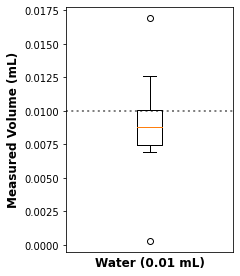

In [6]:
fig = plt.figure(figsize=(3,4.5))
plt.boxplot(df_T2['Volume H2O (mL)'])#, zorder=2)
plt.plot([0.5,1.5],[0.01,0.01], color='grey', linestyle=':', linewidth=2, zorder=1)
plt.xlabel('Water (0.01 mL)', fontsize=12, fontweight='bold')
plt.xticks(ticks=[])
plt.ylabel('Measured Volume (mL)', fontsize=12, fontweight='bold')

fig.savefig('output_vis\\vis-cbx-si-errors-mwp-Boxplot.png')